In [2]:
import numpy
import cv2
import time, os, sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from tifffile import imwrite
import tkinter as tk
from tkinter import filedialog
import skimage.io
from matplotlib.pyplot import figure
from scipy import ndimage


In [3]:
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()
img = skimage.io.imread(file_path)

img=-img


EROSION TO FILL GAPS IN JET

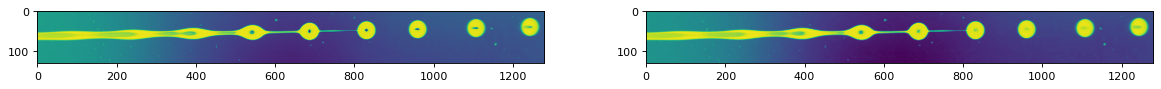

In [4]:
newImg=np.zeros([2500,132,1280])

for ii in range(2500):
    new = cv2.split(img[ii,:,:])[0]
#(retVal, newImg) = cv2.threshold(newImg, 130, 255, cv2.THRESH_BINARY)
    kernel = numpy.ones((5, 5), numpy.uint8)
    new = cv2.morphologyEx(new, cv2.MORPH_CLOSE, kernel)
    newImg[ii,:,:]=new
    
figure(figsize=(18, 6), dpi=80)
plt.subplot(1,2,1)
plt.imshow(img[100,:,:])
plt.subplot(1,2,2)
plt.imshow(newImg[100,:,:])

TEST ROTATION

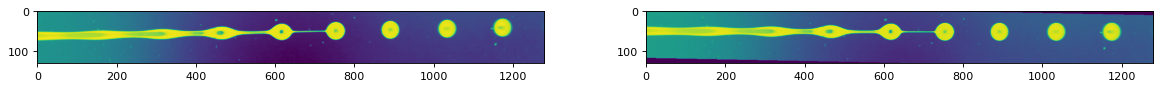

In [5]:
test=newImg[150,:,:]
test_rotate = ndimage.rotate(test, -1.12, reshape=False)

figure(figsize=(18, 6), dpi=80)


plt.subplot(1,2,1)
plt.imshow(test)
plt.subplot(1,2,2)
plt.imshow(test_rotate)

In [6]:
for ii in range(2500):
    newImg[ii,:,:]=ndimage.rotate(newImg[ii,:,:], -1.12, reshape=False)

BINARIZE IMAGE

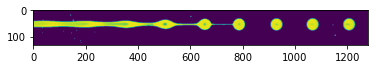

In [7]:
newImg[newImg<150]=0
plt.imshow(newImg[1000,:,:])

FIND FRAGMENTATION LENGTH

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   2.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   2.,  10.,
          8.,  21.,  13.,  49.,  51.,  36.,  69.,  28.,  96.,  39.,  78.,
         63.,  41., 102.,  29.,  57.,  29.,  52.,  22.,  65.,  42.,  28.,
         42.,  28.,  51.,  22.,  39.,  16.,  41.,  43.,  33.,  41.,  14.,
         43.,  33.,  60.,  37.,  21.,  37.,  16.,  39.,  18.,  42.,  14.,
         28.,  32.,  25.,  42.,  16.,  38.,  13.,  34.,  17.,  43.,  34.,
         12.,  30.,  16.,  49.,  22.,  32.,  30.,  16.,  31.,  22.,  33.,
         15.,  22.,   9.,  23.,  25.,   6.,   7.,   2.,   3.,   1.,   1.,
          2.]),
 array([711.  , 712.56, 714.12, 715.68, 717.24, 718.8 , 720.36, 721.92,
        723.48, 725.04, 726.6 , 728.16, 729.72, 731.28, 732.84, 734.4 ,
        735.96, 737.52, 739.08, 740.64, 742.2 , 743.76, 745.32, 746.88,
        748.44, 750.  , 751.56, 753.12, 754.68, 756.24, 757.8 , 759.36,
        760.92, 762.48, 764.04

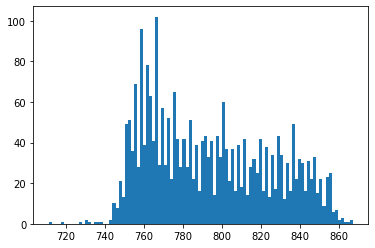

In [8]:
frag=np.zeros(2500)
for ii in range(2500):
    aa=np.sum(newImg[ii,50:70,:],0)
    az=np.where(aa==0)[0]
    frag[ii]=az[0]

plt.hist(frag,100)

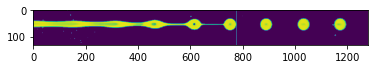

In [12]:
Img_frag=newImg
ii=150
Img_frag[ii,:,int(frag[ii])]=255
plt.imshow(Img_frag[ii,:,:])

SAVE STACK WITH DETECTED FRAGMENTATION

In [14]:
Img_frag=newImg

for ii in range(2500):
    Img_frag[ii,:,int(frag[ii])]=255
    
imwrite('stack_with_fragmentation.tiff',Img_frag)

SHOW DETERMINISTIC ASPECT

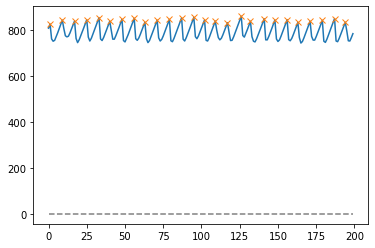

In [15]:

from scipy.signal import find_peaks

x = frag[1000:1200]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [16]:
peaks

array([  1,   9,  17,  25,  33,  40,  48,  56,  63,  71,  79,  87,  95,
       102, 109, 117, 126, 132, 141, 148, 156, 163, 171, 179, 187, 194],
      dtype=int64)

In [17]:
x = frag
peaks, _ = find_peaks(x, height=0)

Fragmentation=np.zeros(peaks.size)

for ii in range(peaks.size):
    Fragmentation[ii]=x[int(peaks[ii])]

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  2.,  3.,
         6.,  4., 11., 25., 20., 39., 31., 33., 32., 36., 22., 22., 18.,
         9.,  3.,  2.,  2.]),
 array([799.        , 801.26666667, 803.53333333, 805.8       ,
        808.06666667, 810.33333333, 812.6       , 814.86666667,
        817.13333333, 819.4       , 821.66666667, 823.93333333,
        826.2       , 828.46666667, 830.73333333, 833.        ,
        835.26666667, 837.53333333, 839.8       , 842.06666667,
        844.33333333, 846.6       , 848.86666667, 851.13333333,
        853.4       , 855.66666667, 857.93333333, 860.2       ,
        862.46666667, 864.73333333, 867.        ]),
 <BarContainer object of 30 artists>)

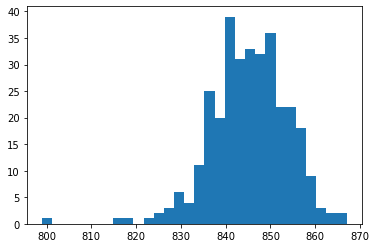

In [34]:
plt.hist(Fragmentation,30)

In [30]:
print('Moyenne =', 4470+6.85*np.mean(Fragmentation), 'µm')

Moyenne = 10259.983641975308 µm


In [32]:
print('Std =', np.std(Fragmentation)*6.85, 'µm')

Std = 58.77735305723648 µm
